## Data Science Programming Assignment 1 - Group 12

- Submitted by - Aswathy Gopalakrishnan, Roshna Roy, Yonge Li

**The dataset used is "Yield per hectar and total production in regions/country for different crops. Yearly data 1965 - 2023". Eventhough data is available from 1965, the last 10 years of data is considered for exploring the tasks in hand.**

In [281]:
import pandas as pd
import numpy as np

In [282]:
# Load the data into a Pandas DataFrame
data = "Yield_data.csv"
df = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')
df

,region,crop,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,01 Stockholm county,winter wheat,6340,6350,5710,5920,3890,6420,7010,5700,6210,4530
1,01 Stockholm county,spring wheat,4090,4230,3640,4100,1770,..,..,..,..,1600
2,01 Stockholm county,rye,..,..,..,..,..,..,..,..,..,..
3,01 Stockholm county,winter barley,..,..,..,..,..,..,..,..,..,..
4,01 Stockholm county,spring barley,4180,4140,4190,4330,2250,3630,4570,2540,4580,2070
...,...,...,...,...,...,...,...,...,...,...,...,...
593,25 Norrbotten county,spring turnip rape,..,..,..,..,..,..,..,..,..,..
594,25 Norrbotten county,oil flax,..,..,..,..,..,..,..,..,..,..
595,25 Norrbotten county,temporary grasses,3520,4420,3920,2840,3270,3950,3680,3960,3530,4560
596,25 Norrbotten county,temporary grasses. First cut,2420,3010,2810,1990,1750,2940,2010,2830,2760,2610


# Tasks based on Exercise 1

### Data Exploration

The data for 10 years(2014-2023) are analysed. 
The data types are checked and the production yield is converted to numeric datatype.


In [283]:
# Convert the year columns to numeric types
year_columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
for year in year_columns:
    df[year] = pd.to_numeric(df[year], errors='coerce')

# Check the data types again
print("Data types of all columns after conversion:")
print(df.dtypes)

Data types of all columns after conversion:
region     object
crop       object
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
2021      float64
2022      float64
2023      float64
dtype: object



### Handling missing values
Data is analysed for missing values. The missing values are given as '..'. Hence, that is replaced by 'NaN' to handle it better.

**1. Does the dataset have any missing values?** 

In [284]:
# Replace '..' with 'NaN'
df.replace('..', np.nan, inplace=True)
print(df)

# Check for null values
df.isnull().any().any()

                   region                          crop    2014    2015  \
0     01 Stockholm county                  winter wheat  6340.0  6350.0   
1     01 Stockholm county                  spring wheat  4090.0  4230.0   
2     01 Stockholm county                           rye     NaN     NaN   
3     01 Stockholm county                 winter barley     NaN     NaN   
4     01 Stockholm county                 spring barley  4180.0  4140.0   
..                    ...                           ...     ...     ...   
593  25 Norrbotten county            spring turnip rape     NaN     NaN   
594  25 Norrbotten county                      oil flax     NaN     NaN   
595  25 Norrbotten county             temporary grasses  3520.0  4420.0   
596  25 Norrbotten county  temporary grasses. First cut  2420.0  3010.0   
597  25 Norrbotten county  temporary grasses. Re-growth     NaN  1400.0   

       2016    2017    2018    2019    2020    2021    2022    2023  
0    5710.0  5920.0  3890.0  

np.True_

**Some crops don't have production in some counties. So, these rows can be dropped.**

In [285]:
# Find the crops with NaN for all years
missing_crops = df[df[year_columns].isnull().all(axis=1)]

# Extract regions without production of the crops every year
regions_without_crops = missing_crops[['region', 'crop']].drop_duplicates()
print(" These regions don't produce the mentioned crops:",regions_without_crops)

# Drop these rows
df_cleaned = df.dropna(subset=year_columns, how='all')
print("DataFrame after removing crops with all NaN values:")
print(df_cleaned)


 These regions don't produce the mentioned crops:                    region                crop
2     01 Stockholm county                 rye
3     01 Stockholm county       winter barley
6     01 Stockholm county    Winter triticale
7     01 Stockholm county    spring triticale
8     01 Stockholm county         mixed grain
..                    ...                 ...
590  25 Norrbotten county         winter rape
591  25 Norrbotten county         spring rape
592  25 Norrbotten county  winter turnip rape
593  25 Norrbotten county  spring turnip rape
594  25 Norrbotten county            oil flax

[359 rows x 2 columns]
DataFrame after removing crops with all NaN values:
                   region                          crop     2014     2015  \
0     01 Stockholm county                  winter wheat   6340.0   6350.0   
1     01 Stockholm county                  spring wheat   4090.0   4230.0   
4     01 Stockholm county                 spring barley   4180.0   4140.0   
5     01 Stock

**The data still have many missing values. The rows which doesn't have values for at least 5 years are dropped. Rest are filled with mean imputation.**

In [286]:
# Setting a threshold to check at least 7 non-NaN values 
threshold = 7 
df_cleaned = df.dropna(subset=year_columns, thresh=threshold)
print(df_cleaned)

                    region                          crop     2014     2015  \
0      01 Stockholm county                  winter wheat   6340.0   6350.0   
4      01 Stockholm county                 spring barley   4180.0   4140.0   
5      01 Stockholm county                          oats   3980.0   3620.0   
9      01 Stockholm county                          peas   3230.0   3400.0   
15     01 Stockholm county                   winter rape   3050.0   3420.0   
..                     ...                           ...      ...      ...   
574  24 Vsterbotten county  temporary grasses. Re-growth   1670.0   1280.0   
579   25 Norrbotten county                 spring barley   2740.0   1520.0   
587   25 Norrbotten county                table potatoes  18230.0  13320.0   
595   25 Norrbotten county             temporary grasses   3520.0   4420.0   
596   25 Norrbotten county  temporary grasses. First cut   2420.0   3010.0   

        2016     2017     2018     2019     2020    2021    202

In [287]:
# Checking for null values again
df_cleaned.isnull().any().any()

np.True_

The missing values now present needs to filled using mean imputation

In [288]:
df = df_cleaned

# Calculating mean for each row
df['mean_production'] = df[year_columns].mean(axis=1).round()

C:\Users\USER\AppData\Local\Temp\ipykernel_25520\1033513994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_production'] = df[year_columns].mean(axis=1).round()


In [289]:
# Replace NaN values in the year columns with the corresponding mean values
for index, row in df.iterrows():
    mean_value = row['mean_production']
    for year in year_columns:
        if pd.isnull(row[year]):
            df.at[index, year] = round(mean_value)
            
# Check for any remaining null values
print("Count of null values after replacing with mean production values:")
print(df.isnull().sum())

# Save the updated DataFrame
output_file = "final_updated_yield_data.csv"
df.to_csv(output_file, index=False)
print(f"The dataset has been saved as '{output_file}'.")


Count of null values after replacing with mean production values:
region             0
crop               0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               0
2023               0
mean_production    0
dtype: int64
The dataset has been saved as 'final_updated_yield_data.csv'.


**2. What different _product types_ are there in the dataset?**

In [290]:
df['crop'].unique().tolist()

['winter wheat',
 'spring barley',
 'oats',
 'peas',
 'winter rape',
 'temporary grasses',
 'temporary grasses. First cut',
 'spring wheat',
 'spring rape',
 'temporary grasses. Re-growth',
 'Winter triticale',
 'field beans',
 'rye',
 'winter barley',
 'table potatoes',
 'oil flax',
 'potatoes for processing of starch',
 'sugar beets',
 'corn',
 'mixed grain']

**3. how many differernt regions in the dataset?** 

In [291]:
print(f"There are {df['region'].nunique()} counties.")

There are 21 counties.


**4. What different _"counties"  are there in the dataset?** 

In [292]:
df['region'].unique().tolist()

['01 Stockholm county',
 '03 Uppsala county',
 '04 Sdermanland county',
 '05 stergtland county',
 '06 Jnkping county',
 '07 Kronoberg county',
 '08 Kalmar county',
 '09 Gotland county',
 '10 Blekinge county',
 '12 Skne county',
 '13 Halland county',
 '14 Vstra Gtaland county',
 '17 Vrmland county',
 '18 rebro county',
 '19 Vstmanland county',
 '20 Dalarna county',
 '21 Gvleborg county',
 '22 Vsternorrland county',
 '23 Jmtland county',
 '24 Vsterbotten county',
 '25 Norrbotten county']

**5. Which product type generates the most/the least, on average?** 

In [293]:
total_yield = df[year_columns].sum(axis=1)
max_yield = total_yield.max()
min_yield = total_yield.min()

print(f"Maximum total yield: {max_yield}")
print(f"Minimum total yield: {min_yield}")

Maximum total yield: 658800.0
Minimum total yield: 12529.0


In [294]:

max_yield_index = total_yield.idxmax()
max_yield_region = df.loc[max_yield_index, 'region']

print(f"Index of maximum total yield: {max_yield_index},Maximum total yield occurred in the region: {max_yield_region} with a value of {total_yield[max_yield_index]}")

min_yield_index = total_yield.idxmin()
min_yield_region = df.loc[min_yield_index, 'region']

print(f"Index of minimum total yield: {min_yield_index},Minimum total yield occurred in the region: {min_yield_region} with a value of {total_yield[min_yield_index]}")



Index of maximum total yield: 221,Maximum total yield occurred in the region: 12 Skne county with a value of 658800.0
Index of minimum total yield: 551,Minimum total yield occurred in the region: 23 Jmtland county with a value of 12529.0


In [295]:

grouped_mean = df.groupby('region')[year_columns].mean()

print(grouped_mean)

                                 2014          2015          2016  \
region                                                              
01 Stockholm county       3864.000000   4178.571429   3530.000000   
03 Uppsala county         4015.500000   4053.000000   3820.000000   
04 Sdermanland county     4038.181818   4474.545455   3852.727273   
05 stergtland county      6502.000000   7082.666667   6588.000000   
06 Jnkping county         3845.000000   4220.000000   3700.000000   
07 Kronoberg county       3780.000000   3806.000000   3606.000000   
08 Kalmar county          7927.500000   7907.500000   7920.000000   
09 Gotland county         6186.153846   6488.461538   6369.692308   
10 Blekinge county       22435.000000  18698.333333  20798.166667   
12 Skne county           13284.294118  12755.352941  12518.235294   
13 Halland county        12558.461538  11543.769231  11275.384615   
14 Vstra Gtaland county   6332.666667   6598.666667   6235.333333   
17 Vrmland county         3554.285

**6. The _distribution_ of yield among all crops?** 

In [296]:
grouped_description = df.groupby('crop')[year_columns].describe()

print(grouped_description)

                                   2014                                      \
                                  count          mean          std      min   
crop                                                                          
Winter triticale                    6.0   6096.666667   444.687156   5450.0   
corn                                1.0   7060.000000          NaN   7060.0   
field beans                         6.0   3056.833333   551.267781   2090.0   
mixed grain                         1.0   3260.000000          NaN   3260.0   
oats                               17.0   3882.117647   683.663832   2476.0   
oil flax                            1.0   1740.000000          NaN   1740.0   
peas                               10.0   3279.300000   366.321671   2700.0   
potatoes for processing of starch   3.0  44530.000000  2386.273245  42100.0   
rye                                 4.0   6060.000000  1451.849395   4150.0   
spring barley                      21.0   4106.66666

**7. calculate the total yield for each region over all the years（frome 2014 to 2023）** 

In [297]:
pivot_yield = df.pivot_table(values=year_columns, index='region', aggfunc='sum')
# pivot_yield = df.pivot_table(values=year_columns, index='region', aggfunc='sum')

print(pivot_yield)

                             2014      2015      2016      2017      2018  \
region                                                                      
01 Stockholm county       27048.0   29250.0   24710.0   26420.0   15220.0   
03 Uppsala county         40155.0   40530.0   38200.0   37315.0   22580.0   
04 Sdermanland county     44420.0   49220.0   42380.0   40420.0   27390.0   
05 stergtland county      97530.0  106240.0   98820.0  107870.0   81520.0   
06 Jnkping county         23070.0   25320.0   22200.0   25750.0   15910.0   
07 Kronoberg county       18900.0   19030.0   18030.0   19290.0   13430.0   
08 Kalmar county          95130.0   94890.0   95040.0   97490.0   62770.0   
09 Gotland county         80420.0   84350.0   82806.0   79140.0   56206.0   
10 Blekinge county       134610.0  112190.0  124789.0  127620.0   95530.0   
12 Skne county           225833.0  216841.0  212810.0  218070.0  166570.0   
13 Halland county        163260.0  150069.0  146580.0  145720.0  125229.0   

### Data Preprocessing

So far we just looked at the data in different ways, now we're going to modify it.

**Filter the DataFrame to include only groups (by 'region') where at least one row has non-missing values for all columns in 'year_columns'**

In [298]:
df_subset = df.groupby("region").filter(
    lambda x: (x[year_columns].notna().sum(axis=1) == len(year_columns)).any()
)

print(df_subset)

                    region                          crop     2014     2015  \
0      01 Stockholm county                  winter wheat   6340.0   6350.0   
4      01 Stockholm county                 spring barley   4180.0   4140.0   
5      01 Stockholm county                          oats   3980.0   3620.0   
9      01 Stockholm county                          peas   3230.0   3400.0   
15     01 Stockholm county                   winter rape   3050.0   3420.0   
..                     ...                           ...      ...      ...   
574  24 Vsterbotten county  temporary grasses. Re-growth   1670.0   1280.0   
579   25 Norrbotten county                 spring barley   2740.0   1520.0   
587   25 Norrbotten county                table potatoes  18230.0  13320.0   
595   25 Norrbotten county             temporary grasses   3520.0   4420.0   
596   25 Norrbotten county  temporary grasses. First cut   2420.0   3010.0   

        2016     2017     2018     2019     2020     2021     2

# Tasks based on Exercise 7

### 1. Filtering

**Filter the data for a particular region**

In [299]:
# Filtering the DataFrame for the specific region
selected_region = '01 Stockholm county'
filtered_df = df[df['region'] == selected_region]

# Display the filtered DataFrame
print(f"Filtered DataFrame for region '{selected_region}':", filtered_df)

Filtered DataFrame for region '01 Stockholm county':                  region                          crop    2014    2015    2016  \
0   01 Stockholm county                  winter wheat  6340.0  6350.0  5710.0   
4   01 Stockholm county                 spring barley  4180.0  4140.0  4190.0   
5   01 Stockholm county                          oats  3980.0  3620.0  2900.0   
9   01 Stockholm county                          peas  3230.0  3400.0  3490.0   
15  01 Stockholm county                   winter rape  3050.0  3420.0  3050.0   
20  01 Stockholm county             temporary grasses  3527.0  4480.0  3100.0   
21  01 Stockholm county  temporary grasses. First cut  2741.0  3840.0  2270.0   

      2017    2018    2019    2020    2021    2022    2023  mean_production  
0   5920.0  3890.0  6420.0  7010.0  5700.0  6210.0  4530.0           5808.0  
4   4330.0  2250.0  3630.0  4570.0  2540.0  4580.0  2070.0           3648.0  
5   3780.0  1550.0  3820.0  4420.0  2710.0  4250.0  2500.0      

**Filter the data for a particular crop**

In [300]:
# Filtering the DataFrame for the specific crop
selected_crop = 'rye'
filtered_df = df[df['crop'] == selected_crop]

# Display the filtered DataFrame
print(f"Filtered DataFrame for region '{selected_crop}':", filtered_df)

Filtered DataFrame for region 'rye':                       region crop    2014    2015    2016    2017    2018  \
71      05 stergtland county  rye  7010.0  7470.0  6870.0  7440.0  5930.0   
163        09 Gotland county  rye  4150.0  4620.0  4576.0  5170.0  4576.0   
209           12 Skne county  rye  7350.0  6730.0  6540.0  7240.0  4730.0   
301  14 Vstra Gtaland county  rye  5730.0  6180.0  5690.0  6130.0  4330.0   

       2019    2020    2021    2022    2023  mean_production  
71   7410.0  6660.0  6570.0  6802.0  5860.0           6802.0  
163  5470.0  5360.0  3620.0  4710.0  3510.0           4576.0  
209  7430.0  6770.0  5800.0  7360.0  5530.0           6548.0  
301  6510.0  5880.0  6150.0  6400.0  5570.0           5857.0  


**Filter the data for a region and a crop**

In [301]:
selected_region = '01 Stockholm county'
selected_crop = 'oats'

# Filtering for the specific region and crop
filtered_df_region_crop = df[(df['region'] == selected_region) & (df['crop'] == selected_crop)]

# Display the filtered DataFrame
print(f"Filtered DataFrame for region '{selected_region}' and crop '{selected_crop}':")
print(filtered_df_region_crop)

Filtered DataFrame for region '01 Stockholm county' and crop 'oats':
                region  crop    2014    2015    2016    2017    2018    2019  \
5  01 Stockholm county  oats  3980.0  3620.0  2900.0  3780.0  1550.0  3820.0   

     2020    2021    2022    2023  mean_production  
5  4420.0  2710.0  4250.0  2500.0           3353.0  


**Filter the years where yield value is more than 3000 for a given region and crop**

In [302]:
# Filtering the data for the specified region and crop
filtered_row = df[(df['region'] == selected_region) & (df['crop'] == selected_crop)]
# Extracting the yield values for the years
yield_values = filtered_row[year_columns].iloc[0]  # Access the first row of yield values
# Filtering data with yields greater than 3000
years_with_high_yield = yield_values[yield_values > 3000].index.tolist()
print(f"Years where yield was more than 3000 for region '{selected_region}' and crop '{selected_crop}':")
print(years_with_high_yield)

Years where yield was more than 3000 for region '01 Stockholm county' and crop 'oats':
['2014', '2015', '2017', '2019', '2020', '2022']


**Select the values in 'crop' columns and assign them to a variable 'crop_types`. Then find the unique crop names from it. Use unique().**

In [303]:
crop_types = df['crop']
# Find unique crop types
unique_crops = crop_types.unique()
print("Unique crop types:")
print(unique_crops)

Unique crop types:
['winter wheat' 'spring barley' 'oats' 'peas' 'winter rape'
 'temporary grasses' 'temporary grasses. First cut' 'spring wheat'
 'spring rape' 'temporary grasses. Re-growth' 'Winter triticale'
 'field beans' 'rye' 'winter barley' 'table potatoes' 'oil flax'
 'potatoes for processing of starch' 'sugar beets' 'corn' 'mixed grain']


### 2. Rearranging

**Arrange the values in the order of crops**

In [304]:
arranged_dataframe = df.sort_values(by='crop', ascending=True)
print(arranged_dataframe)

                      region              crop    2014    2015    2016  \
52     04 Sdermanland county  Winter triticale  6310.0  6060.0  4750.0   
144         08 Kalmar county  Winter triticale  5450.0  5650.0  6090.0   
305  14 Vstra Gtaland county  Winter triticale  5740.0  5820.0  4880.0   
213           12 Skne county  Winter triticale  6590.0  6190.0  5770.0   
75      05 stergtland county  Winter triticale  6010.0  6470.0  6030.0   
..                       ...               ...     ...     ...     ...   
161        09 Gotland county      winter wheat  6040.0  7310.0  6480.0   
460        20 Dalarna county      winter wheat  5960.0  5070.0  5670.0   
92         06 Jnkping county      winter wheat  5930.0  6650.0  5530.0   
207           12 Skne county      winter wheat  8410.0  8430.0  7670.0   
0        01 Stockholm county      winter wheat  6340.0  6350.0  5710.0   

       2017    2018    2019    2020    2021    2022    2023  mean_production  
52   5660.0  3810.0  6390.0  640

**Rearrange the columns to move 'crop' to the front**

In [305]:
new_column_order = ['crop'] + [col for col in df.columns if col != 'crop']  

# Reassign the DataFrame with the new column order
df = df[new_column_order]

# Display the rearranged DataFrame
print("\nRearranged DataFrame with 'Crop' as first column:")
print(df)


Rearranged DataFrame with 'Crop' as first column:
                             crop                 region     2014     2015  \
0                    winter wheat    01 Stockholm county   6340.0   6350.0   
4                   spring barley    01 Stockholm county   4180.0   4140.0   
5                            oats    01 Stockholm county   3980.0   3620.0   
9                            peas    01 Stockholm county   3230.0   3400.0   
15                    winter rape    01 Stockholm county   3050.0   3420.0   
..                            ...                    ...      ...      ...   
574  temporary grasses. Re-growth  24 Vsterbotten county   1670.0   1280.0   
579                 spring barley   25 Norrbotten county   2740.0   1520.0   
587                table potatoes   25 Norrbotten county  18230.0  13320.0   
595             temporary grasses   25 Norrbotten county   3520.0   4420.0   
596  temporary grasses. First cut   25 Norrbotten county   2420.0   3010.0   

        2016

### 3. Renaming columns

**Rename the column 'region' to 'county'. Use rename().**

In [306]:
df.rename(columns={'region': 'county'}, inplace=True)

# Display the updated DataFrame
print("\nUpdated DataFrame after renaming 'region' to 'county':")
print(df)


Updated DataFrame after renaming 'region' to 'county':
                             crop                 county     2014     2015  \
0                    winter wheat    01 Stockholm county   6340.0   6350.0   
4                   spring barley    01 Stockholm county   4180.0   4140.0   
5                            oats    01 Stockholm county   3980.0   3620.0   
9                            peas    01 Stockholm county   3230.0   3400.0   
15                    winter rape    01 Stockholm county   3050.0   3420.0   
..                            ...                    ...      ...      ...   
574  temporary grasses. Re-growth  24 Vsterbotten county   1670.0   1280.0   
579                 spring barley   25 Norrbotten county   2740.0   1520.0   
587                table potatoes   25 Norrbotten county  18230.0  13320.0   
595             temporary grasses   25 Norrbotten county   3520.0   4420.0   
596  temporary grasses. First cut   25 Norrbotten county   2420.0   3010.0   

       

### 4. Creating new columns

**Create a new column: a column "Total yield for 10 years" which is the sum of yield for 10 years. Use sum().**

In [307]:
df['Total yield for 10 years'] = df[year_columns].sum(axis=1)

# printing the columns to confirm the new column was added
print("\nDataFrame Columns:")
print(df.columns)



DataFrame Columns:
Index(['crop', 'county', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', 'mean_production',
       'Total yield for 10 years'],
      dtype='object')


**Make a new column "Yield above average" that is `TRUE` when the average yield of 10 years is above the average of the dataset, and `FALSE` otherwise. Use mean().**

In [308]:
# Calculating the average yield across the dataset
average_yield = df['Total yield for 10 years'].mean()

# Creating a new column "Yield above average"
df['Yield above average'] = df['Total yield for 10 years'] > average_yield

# Displaying the updated DataFrame to see the column
print("\nUpdated DataFrame with 'Yield above average':")
print(df[['county', 'crop', 'Total yield for 10 years', 'Yield above average']])


Updated DataFrame with 'Yield above average':
                    county                          crop  \
0      01 Stockholm county                  winter wheat   
4      01 Stockholm county                 spring barley   
5      01 Stockholm county                          oats   
9      01 Stockholm county                          peas   
15     01 Stockholm county                   winter rape   
..                     ...                           ...   
574  24 Vsterbotten county  temporary grasses. Re-growth   
579   25 Norrbotten county                 spring barley   
587   25 Norrbotten county                table potatoes   
595   25 Norrbotten county             temporary grasses   
596   25 Norrbotten county  temporary grasses. First cut   

     Total yield for 10 years  Yield above average  
0                     58080.0                False  
4                     36480.0                False  
5                     33530.0                False  
9                   

### 5. Grouping and Summarising

**Find how many instances of each crop type are there, and which one generates the most/the least yield, on an average? Use groupby() and agg() to summarise the values.**

In [309]:
# Group by crop, counting instances and calculating average yield
summary = df.groupby('crop').agg(
    instance_count=('crop', 'size'),               # Count instances of each crop
    average_yield=('Total yield for 10 years', 'mean')          # Calculate average yield for each crop
).reset_index()

# Identify the crop that generates the most and least yield
most_yield_crop = summary.loc[summary['average_yield'].idxmax()]
least_yield_crop = summary.loc[summary['average_yield'].idxmin()]

# Display summary and most/least yield crops
print("Crop Summary:")
print(summary)

print(f"\nCrop with the most yield (average): {most_yield_crop['crop']} with average yield {most_yield_crop['average_yield']:.2f}")
print(f"Crop with the least yield (average): {least_yield_crop['crop']} with average yield {least_yield_crop['average_yield']:.2f}")

Crop Summary:
                                 crop  instance_count  average_yield
0                    Winter triticale               6   56261.666667
1                                corn               1   70211.000000
2                         field beans               6   30692.833333
3                         mixed grain               1   35590.000000
4                                oats              17   37109.294118
5                            oil flax               1   17450.000000
6                                peas              10   31233.300000
7   potatoes for processing of starch               3  418613.333333
8                                 rye               4   59458.500000
9                       spring barley              21   38855.238095
10                        spring rape               3   20714.666667
11                       spring wheat              14   42044.785714
12                        sugar beets               3  634333.333333
13                  

**Find the minimum, maximum, average and median yield for a county**

In [310]:
yield_summary = df.groupby('crop')[year_columns].agg(
    min_yield=('2023', 'min'),
    max_yield=('2023', 'max'),  # Specify which year to use for max
    avg_yield=('2023', 'mean'),  # Specify which year to use for average
    median_yield=('2023', 'median')  # Specify which year to use for median
).reset_index()

# Display the yield summary
print("\nYield Summary per County:")
print(yield_summary)


Yield Summary per County:
                                 crop  min_yield  max_yield     avg_yield  \
0                    Winter triticale     3320.0     4960.0   4288.333333   
1                                corn     8210.0     8210.0   8210.000000   
2                         field beans     1690.0     2790.0   2489.833333   
3                         mixed grain     3160.0     3160.0   3160.000000   
4                                oats     1950.0     3550.0   2742.352941   
5                            oil flax     1190.0     1190.0   1190.000000   
6                                peas     1250.0     3090.0   2155.000000   
7   potatoes for processing of starch    43080.0    44240.0  43693.333333   
8                                 rye     3510.0     5860.0   5117.500000   
9                       spring barley     1980.0     3980.0   2762.857143   
10                        spring rape     1760.0     2390.0   1990.000000   
11                       spring wheat     1670.0 

# Tasks based on Exercise 8

  ### 1. Tidy Data
**Transform the dataset into a tidy version!
This script tidies crop yield data, fills gaps with row averages, and visualizes yearly trends by crop.**

                region           crop  year   yield
0  01 Stockholm county   winter wheat  2014  6340.0
1  01 Stockholm county   spring wheat  2014  4090.0
2  01 Stockholm county  spring barley  2014  4180.0
3  01 Stockholm county           oats  2014  3980.0
4  01 Stockholm county           peas  2014  3230.0


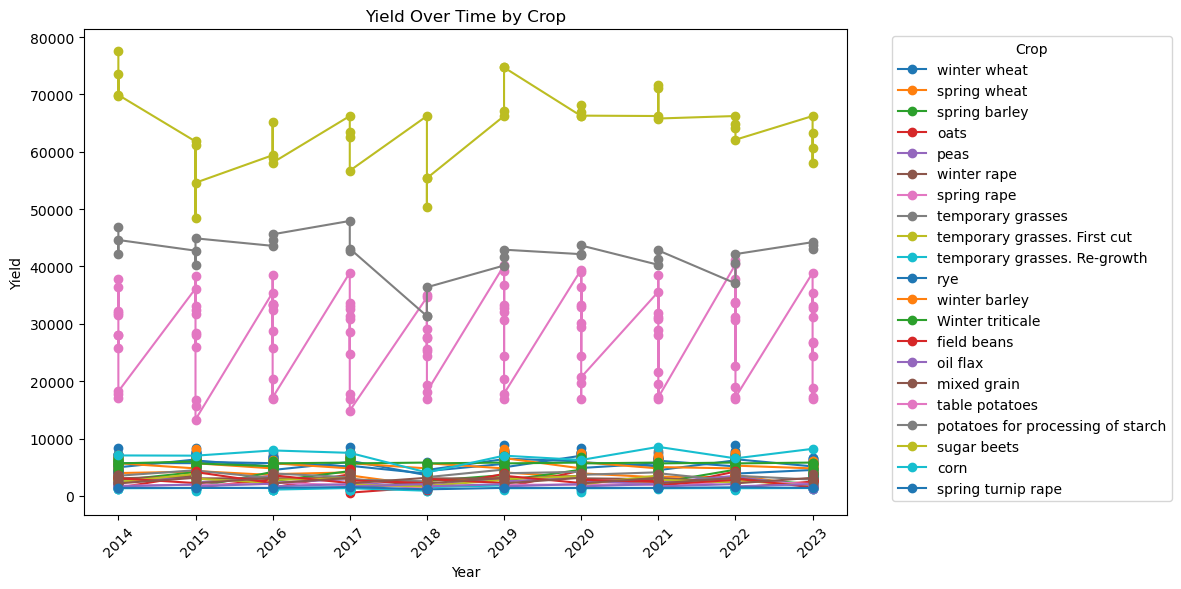

In [311]:
import matplotlib.pyplot as plt

df = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')

# Step 2: Replace '..' with NaN
df.replace('..', pd.NA, inplace=True)

# Step 3: Convert year columns to numeric types
year_columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
for year in year_columns:
    df[year] = pd.to_numeric(df[year], errors='coerce')

# Step 4: Drop rows with all NaN values in year columns
df_cleaned = df.dropna(subset=year_columns, how='all').copy()

# Step 5: Fill remaining NaN values with mean imputation
df_cleaned['mean_production'] = df_cleaned[year_columns].mean(axis=1)

# Replace NaN values in year columns with the corresponding mean values
for index, row in df_cleaned.iterrows():
    mean_value = row['mean_production']
    for year in year_columns:
        if pd.isnull(row[year]):
            df_cleaned.at[index, year] = round(mean_value)

# Step 6: Melt the DataFrame to tidy it
tidy_yield = pd.melt(df_cleaned, 
                      id_vars=['region', 'crop'], 
                      value_vars=year_columns, 
                      var_name='year', 
                      value_name='yield')

# Step 7: Convert year to numeric
tidy_yield['year'] = pd.to_numeric(tidy_yield['year'], errors='coerce')

# Step 8: Remove rows with missing values in the yield column
tidy_yield = tidy_yield.dropna(subset=['yield'])

# Step 9: Display the tidy DataFrame
print(tidy_yield.head())

# Step 10: Plotting the data using matplotlib
plt.figure(figsize=(12, 6))

# Loop through each crop to plot its yield over the years
for crop in tidy_yield['crop'].unique():
    crop_data = tidy_yield[tidy_yield['crop'] == crop]
    plt.plot(crop_data['year'], crop_data['yield'], marker='o', label=crop)

plt.title('Yield Over Time by Crop')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.xticks(ticks=range(2014, 2024), rotation=45)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

  ### 2. Pivoting

**This script pivots crop yield data between wide and long formats for improved analysis.**

In [312]:
# Pivoting the tidy DataFrame back to wide format
pivoted_yield = tidy_yield.pivot_table(index=['region', 'crop'], 
                                        columns='year', 
                                        values='yield', 
                                        aggfunc='first').reset_index()

# Ensure that the year columns are named correctly
pivoted_yield.columns.name = None  # Remove the name of the columns if needed
pivoted_yield.columns = [str(col) for col in pivoted_yield.columns]  # Convert column names to string

# Display the pivoted DataFrame with meaningful column names
print("\nPivoted DataFrame with Meaningful Column Names:")
print(pivoted_yield)


Pivoted DataFrame with Meaningful Column Names:
                   region                          crop     2014     2015  \
0     01 Stockholm county                          oats   3980.0   3620.0   
1     01 Stockholm county                          peas   3230.0   3400.0   
2     01 Stockholm county                 spring barley   4180.0   4140.0   
3     01 Stockholm county                   spring rape   1770.0   1962.0   
4     01 Stockholm county                  spring wheat   4090.0   4230.0   
..                    ...                           ...      ...      ...   
234  25 Norrbotten county                 spring barley   2740.0   1520.0   
235  25 Norrbotten county                table potatoes  18230.0  13320.0   
236  25 Norrbotten county             temporary grasses   3520.0   4420.0   
237  25 Norrbotten county  temporary grasses. First cut   2420.0   3010.0   
238  25 Norrbotten county  temporary grasses. Re-growth   1340.0   1400.0   

        2016     2017     

  ### 3. Separating and uniting

  **We are trying separating and uniting tasks on the dataset features. The region column has the county code and name. We are trying to separate them to code and county.**

In [313]:
# Separating the 'region' column into 'code' and 'county_name'
df_cleaned[['code', 'county_name']] = df_cleaned['region'].str.split(' ', n=1, expand=True)

# Display the DataFrame after separation
print("\nDataFrame after separating 'region' into 'code' and 'county_name':")
print(df_cleaned)


DataFrame after separating 'region' into 'code' and 'county_name':
                   region                          crop     2014     2015  \
0     01 Stockholm county                  winter wheat   6340.0   6350.0   
1     01 Stockholm county                  spring wheat   4090.0   4230.0   
4     01 Stockholm county                 spring barley   4180.0   4140.0   
5     01 Stockholm county                          oats   3980.0   3620.0   
9     01 Stockholm county                          peas   3230.0   3400.0   
..                    ...                           ...      ...      ...   
580  25 Norrbotten county                          oats   1445.0   1445.0   
587  25 Norrbotten county                table potatoes  18230.0  13320.0   
595  25 Norrbotten county             temporary grasses   3520.0   4420.0   
596  25 Norrbotten county  temporary grasses. First cut   2420.0   3010.0   
597  25 Norrbotten county  temporary grasses. Re-growth   1340.0   1400.0   

       

**Now the 'code' is combined with the 'crop' to form a new column 'regional crop'.**

In [314]:
# Unite 'code' and 'county_name' back into 'region'
df_cleaned['regional crop'] = df_cleaned['code'] + ' ' + df_cleaned['crop']

# Display the DataFrame after uniting
print("\nDataFrame after uniting 'code' and 'crop' and 'regional crop':")
print(df_cleaned)


DataFrame after uniting 'code' and 'crop' and 'regional crop':
                   region                          crop     2014     2015  \
0     01 Stockholm county                  winter wheat   6340.0   6350.0   
1     01 Stockholm county                  spring wheat   4090.0   4230.0   
4     01 Stockholm county                 spring barley   4180.0   4140.0   
5     01 Stockholm county                          oats   3980.0   3620.0   
9     01 Stockholm county                          peas   3230.0   3400.0   
..                    ...                           ...      ...      ...   
580  25 Norrbotten county                          oats   1445.0   1445.0   
587  25 Norrbotten county                table potatoes  18230.0  13320.0   
595  25 Norrbotten county             temporary grasses   3520.0   4420.0   
596  25 Norrbotten county  temporary grasses. First cut   2420.0   3010.0   
597  25 Norrbotten county  temporary grasses. Re-growth   1340.0   1400.0   

        201

**After experimenting the newly created columns are dropped to ensure that the df is cleaned properly for further use.**

In [315]:
df_cleaned.drop(columns=['code', 'county_name', 'regional crop'], inplace=True)
print(df_cleaned)

                   region                          crop     2014     2015  \
0     01 Stockholm county                  winter wheat   6340.0   6350.0   
1     01 Stockholm county                  spring wheat   4090.0   4230.0   
4     01 Stockholm county                 spring barley   4180.0   4140.0   
5     01 Stockholm county                          oats   3980.0   3620.0   
9     01 Stockholm county                          peas   3230.0   3400.0   
..                    ...                           ...      ...      ...   
580  25 Norrbotten county                          oats   1445.0   1445.0   
587  25 Norrbotten county                table potatoes  18230.0  13320.0   
595  25 Norrbotten county             temporary grasses   3520.0   4420.0   
596  25 Norrbotten county  temporary grasses. First cut   2420.0   3010.0   
597  25 Norrbotten county  temporary grasses. Re-growth   1340.0   1400.0   

        2016     2017     2018     2019     2020     2021     2022     2023

### 9. Combining Datasets

**So far, we have only used data for 10 years, 2014-2023. Now, another dataset "Yield_data_extra.csv" is extracted from the database to see how combining of datasets work. In this, another 5 years data is taken for year 2009-2013.**

In [316]:
data = "Yield_data_extra.csv"
df_extra = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')
df_extra

,region,crop,2009,2010,2011,2012,2013
0,01 Stockholm county,winter wheat,4690,3990,3870,6100,3460
1,01 Stockholm county,spring wheat,4060,3440,3430,3900,4180
2,01 Stockholm county,rye,..,..,..,..,..
3,01 Stockholm county,winter barley,..,..,..,..,..
4,01 Stockholm county,spring barley,4160,3190,3460,3840,4140
...,...,...,...,...,...,...,...
593,25 Norrbotten county,spring turnip rape,..,..,..,..,..
594,25 Norrbotten county,oil flax,..,..,..,..,..
595,25 Norrbotten county,temporary grasses,..,..,..,3270,..
596,25 Norrbotten county,temporary grasses. First cut,..,..,..,2530,..


**Concatenate the two datasets `df` and `df_extra` into a DataFrame `df_new`,**

In [317]:
df_new = pd.concat([df, df_extra], ignore_index=True)
df_new

,region,crop,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2009,2010,2011,2012,2013
0,01 Stockholm county,winter wheat,6340.0,6350.0,5710.0,5920.0,3890.0,6420.0,7010.0,5700.0,6210.0,4530.0,NaN,NaN,NaN,NaN,NaN
1,01 Stockholm county,spring wheat,4090.0,4230.0,3640.0,4100.0,1770.0,NaN,NaN,NaN,NaN,1600.0,NaN,NaN,NaN,NaN,NaN
2,01 Stockholm county,rye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01 Stockholm county,winter barley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01 Stockholm county,spring barley,4180.0,4140.0,4190.0,4330.0,2250.0,3630.0,4570.0,2540.0,4580.0,2070.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,25 Norrbotten county,spring turnip rape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,..,..,..,..
1192,25 Norrbotten county,oil flax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,..,..,..,..
1193,25 Norrbotten county,temporary grasses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,..,..,3270,..
1194,25 Norrbotten county,temporary grasses. First cut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,..,..,2530,..


**Merge `df_new` with `df_error`.**


Another dataset that provides information on yield's standard error by region, crop and year is considered here. This data set has error values for year 2014-2023. The common columns in both yield data and yield error data are the county and crop names. So, we are trying to a left join to combine the error values to the yield data dataset taking the common column region as the merging factor.

In [318]:
data = "Yield_error_data.csv"
df_error = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')
df_error

,region,crop,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,01 Stockholm county,winter wheat,3.0,2.2,2.6,1.8,3.1,1.7,1.9,2.4,1.4,4.8,2.2,2.3,2.0,1.9,1.9
1,01 Stockholm county,spring wheat,7.3,2.2,3.7,3.5,2.3,3.4,6.8,3.5,3.0,8.4,..,..,..,..,7.9
2,01 Stockholm county,rye,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
3,01 Stockholm county,winter barley,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,01 Stockholm county,spring barley,3.3,3.1,3.6,3.3,2.0,2.6,4.3,2.9,3.0,4.9,3.8,1.8,5.0,3.4,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,25 Norrbotten county,spring turnip rape,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
594,25 Norrbotten county,oil flax,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
595,25 Norrbotten county,temporary grasses,..,..,..,9.9,..,10.4,12.2,7.4,11.2,11.9,7.8,9.6,8.8,11.7,17.3
596,25 Norrbotten county,temporary grasses. First cut,..,..,..,13.7,..,10.4,6.5,8.1,10.9,9.7,8.2,8.0,9.1,14.4,10.5


In [319]:
pd.merge(
    df_new, df_error, "left", on="region"
)  

,region,crop_x,2014_x,2015_x,2016_x,2017_x,2018_x,2019_x,2020_x,2021_x,...,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y
0,01 Stockholm county,winter wheat,6340.0,6350.0,5710.0,5920.0,3890.0,6420.0,7010.0,5700.0,...,1.7,1.9,2.4,1.4,4.8,2.2,2.3,2.0,1.9,1.9
1,01 Stockholm county,winter wheat,6340.0,6350.0,5710.0,5920.0,3890.0,6420.0,7010.0,5700.0,...,3.4,6.8,3.5,3.0,8.4,..,..,..,..,7.9
2,01 Stockholm county,winter wheat,6340.0,6350.0,5710.0,5920.0,3890.0,6420.0,7010.0,5700.0,...,..,..,..,..,..,..,..,..,..,..
3,01 Stockholm county,winter wheat,6340.0,6350.0,5710.0,5920.0,3890.0,6420.0,7010.0,5700.0,...,..,..,..,..,..,..,..,..,..,..
4,01 Stockholm county,winter wheat,6340.0,6350.0,5710.0,5920.0,3890.0,6420.0,7010.0,5700.0,...,2.6,4.3,2.9,3.0,4.9,3.8,1.8,5.0,3.4,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,25 Norrbotten county,temporary grasses. Re-growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,..,..,..,..,..,..,..,..,..,..
27504,25 Norrbotten county,temporary grasses. Re-growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,..,..,..,..,..,..,..,..,..,..
27505,25 Norrbotten county,temporary grasses. Re-growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.4,12.2,7.4,11.2,11.9,7.8,9.6,8.8,11.7,17.3
27506,25 Norrbotten county,temporary grasses. Re-growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.4,6.5,8.1,10.9,9.7,8.2,8.0,9.1,14.4,10.5
